In [312]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load dataset and review the top 5 rows
imdb_data_file_path = "./imdb_dataset.csv"
imdb_data = pd.read_csv(imdb_data_file_path)
imdb_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [313]:
# Show a count for how many times Directors are referenced
imdb_data["Director"].value_counts()

Ridley Scott           8
David Yates            6
Paul W.S. Anderson     6
M. Night Shyamalan     6
Michael Bay            6
                      ..
Simon Verhoeven        1
Peter Atencio          1
Jonathan Jakubowicz    1
Cristian Mungiu        1
Breck Eisner           1
Name: Director, Length: 644, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='Revenue (Millions)'>

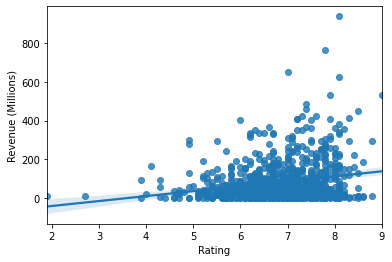

In [314]:
# Scatterplot with regression line to understand the relationship between budget and overall rating
sns.regplot(x=imdb_data['Rating'], y=imdb_data['Revenue (Millions)'])

<AxesSubplot:xlabel='Rating', ylabel='Density'>

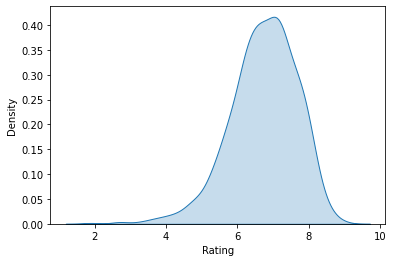

In [315]:
# Kernel density estimate (KDE) plot to undestand the distribution of ratings in our dataset
sns.kdeplot(data=imdb_data['Rating'], shade=True)

In [316]:
# Set the prediction target for the model
y = imdb_data.Rating

# Set the features for the model
imdb_features = ['Revenue (Millions)','Metascore','Runtime (Minutes)','Director']
X = imdb_data[imdb_features]

# Apply label encoder to Director column
label_encoder = LabelEncoder()
X['Director'] = label_encoder.fit_transform(X['Director'])

# Impute missing values
my_imputer = SimpleImputer()
imputed_X = pd.DataFrame(my_imputer.fit_transform(X))
imputed_X.columns = X.columns # Add back columns

# Define the model
imdb_model = RandomForestRegressor(random_state=1)
imdb_model.fit(imputed_X, y)

RandomForestRegressor(random_state=1)

In [317]:
# Gather inputs
name = input('What is the name of the movie?')
revenue = input('What is the box office Revenue in USDm?')
metascore = input('What is the imdb Metascore?')
runtime = input('What is the movie duration in minutes?')
director = input('Who directed the movie?')

# Handle Directors who are not in the training
if imdb_data['Director'].str.contains(director).any():
    director = label_encoder.transform([director])[0]
else:
    director = len(imdb_data) + 1

# Create a simple dataframe from the inputs
movie_attributes = {
    'Revenue (Million)': [revenue],
    'Metascore': [metascore],
    'Runtime (Minutes)': [runtime],
    'Director': [director]
}
data_frame = pd.DataFrame(data=movie_attributes)

# Make the prediction
rating_prediction = imdb_model.predict(data_frame)
print ("The model predicts a rating of " + str(round(rating_prediction[0],1)) + " for " + name)

The model predicts a rating of 7.9 for Tenet
